In [76]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import sklearn

In [77]:
df=pd.read_csv("/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [79]:
df.duplicated().sum()
df.drop_duplicates(inplace = True)

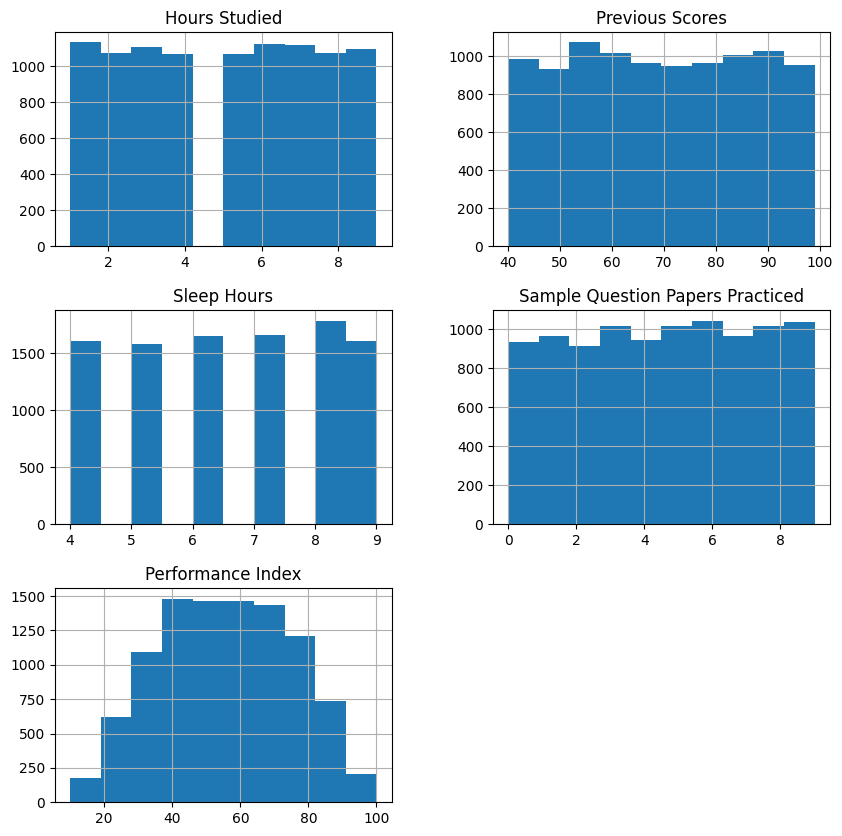

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

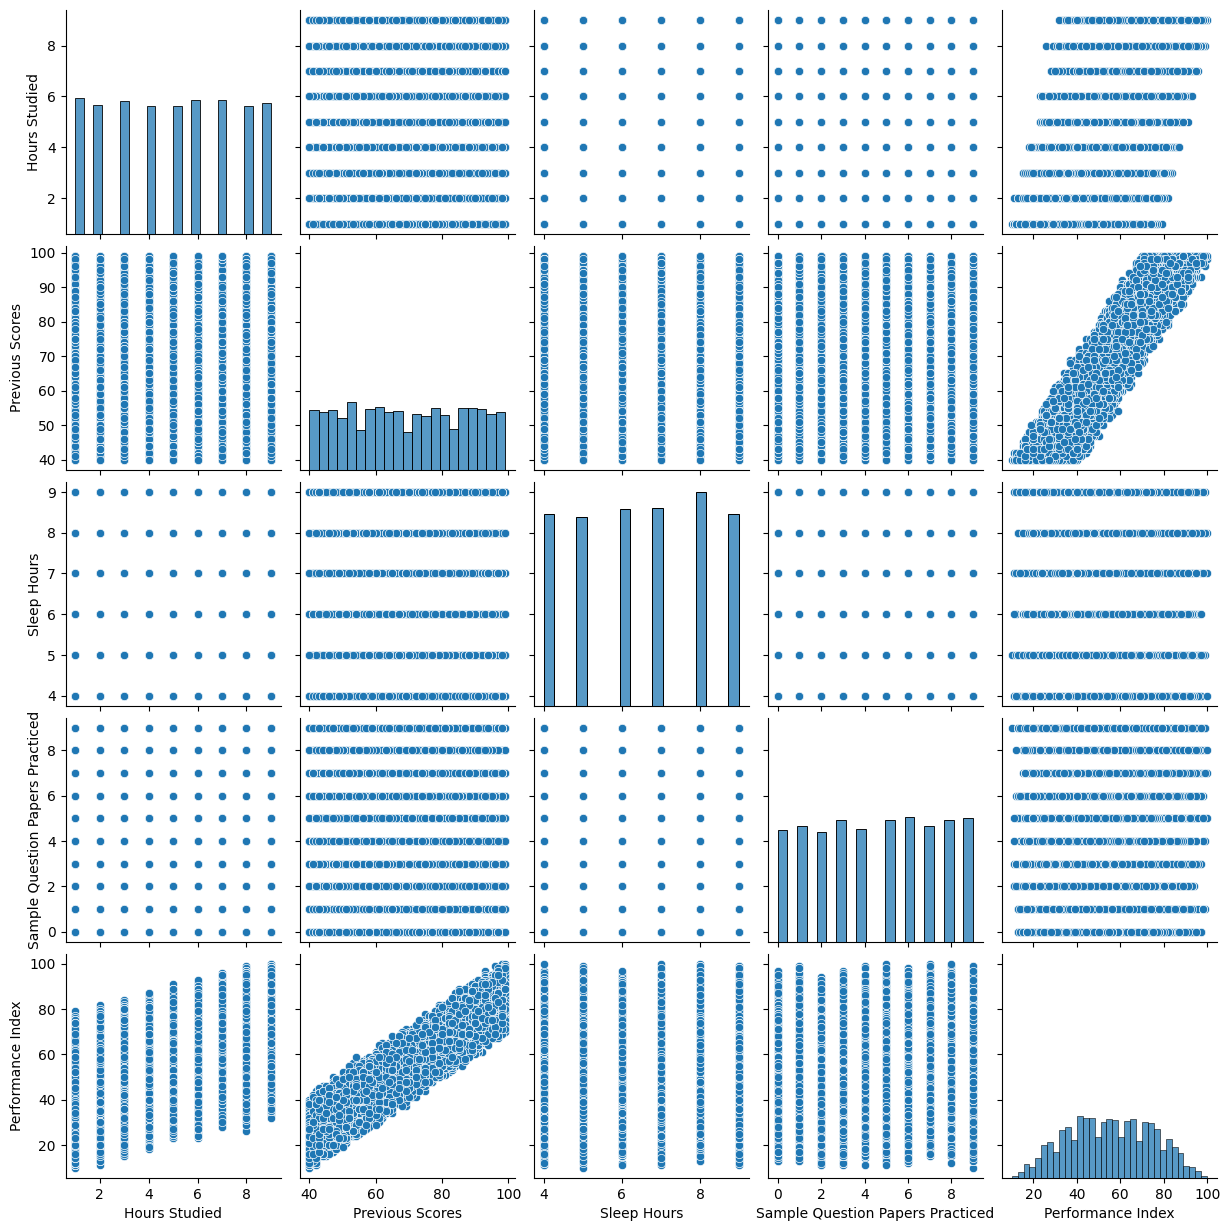

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df.hist(figsize=(10, 10))
plt.show()

sns.pairplot(df)
plt.show()


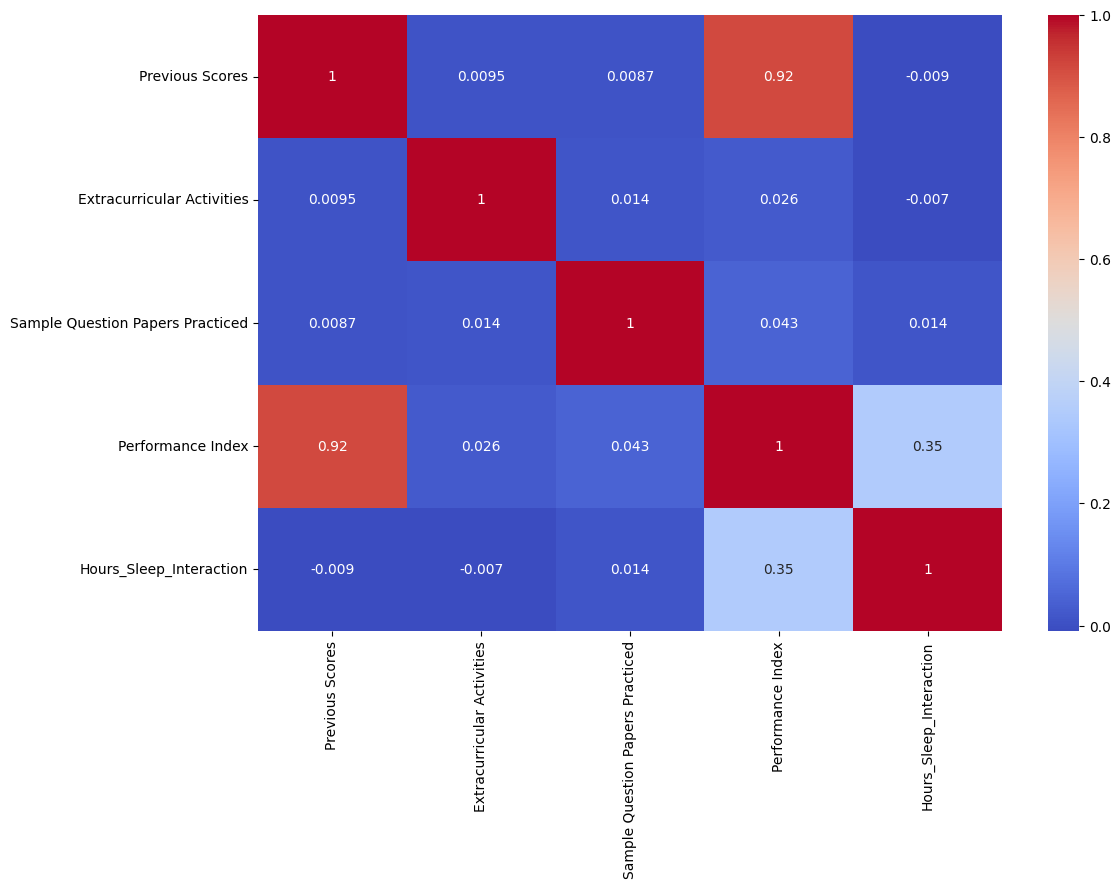

In [83]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [82]:
df['Hours_Sleep_Interaction'] = df['Hours Studied'] * df['Sleep Hours']
df.drop(columns = ['Hours Studied', 'Sleep Hours'], inplace = True)
df['Extracurricular Activities']=df['Extracurricular Activities'].astype('category')
df['Extracurricular Activities']=df['Extracurricular Activities'].cat.codes
df.head()

,Previous Scores,Extracurricular Activities,Sample Question Papers Practiced,Performance Index,Hours_Sleep_Interaction
0,99,1,1,91.0,63
1,82,0,2,65.0,16
2,51,1,2,45.0,56
3,52,1,2,36.0,25
4,75,0,5,66.0,56


In [84]:
from sklearn.model_selection import train_test_split

X = df.drop('Performance Index', axis=1)
y = df['Performance Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [85]:
x_train.shape

(7898, 5)

In [86]:
x_test.shape

(1975, 5)

# Model Training

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


In [88]:
y_predict_test=reg.predict(x_test)
y_predict_test

array([73.05054486, 27.90456729, 39.52609214, ..., 42.51831731,
       34.5411674 , 70.50845371])

# Performance Metrics

In [89]:
# Training set performance
train_mse = mean_squared_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

# Test set performance
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Train MSE: {train_mse}, Train R^2: {train_r2}')
print(f'Test MSE: {test_mse}, Test R^2: {test_r2}')


Train MSE: 13.087193460731795, Train R^2: 0.9644418588032733
Test MSE: 13.243164241873817, Test R^2: 0.9644158539317866


# Performance Plots

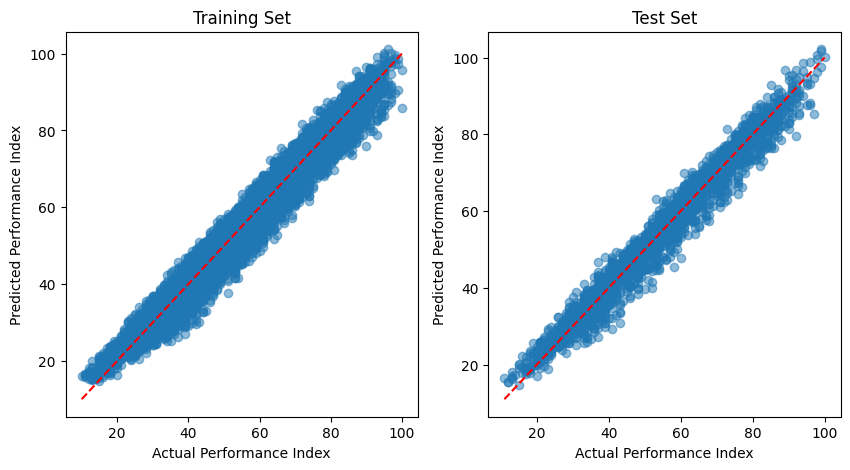

In [90]:
plt.figure(figsize=(10, 5))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Training Set')

# Test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Test Set')

plt.show()


# Residual Plots

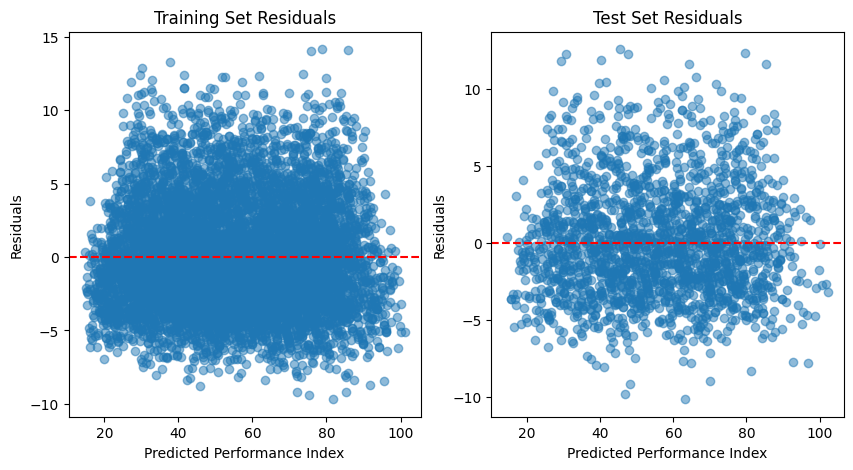

In [91]:
# Residuals
train_residuals = y_train - y_pred_train
test_residuals = y_test - y_pred_test

plt.figure(figsize=(10, 5))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(y_pred_train, train_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Performance Index')
plt.ylabel('Residuals')
plt.title('Training Set Residuals')

# Test set
plt.subplot(1, 2, 2)
plt.scatter(y_pred_test, test_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Performance Index')
plt.ylabel('Residuals')
plt.title('Test Set Residuals')

plt.show()
